In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("balanced_tb_data.csv")

In [20]:
df_test = pd.read_csv('solicited_test.csv')

In [21]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,reported_cough_dur,tb_prior,tb_prior_Pul,hemoptysis,heart_rate,temperature,weight_loss,smoke_lweek,fever,night_sweats
0,-0.034994,0.025785,-0.126753,-0.032978,-0.104685,-0.141457,0.080810,-0.008430,0.025698,-0.357474,...,30,No,No,No,102,36.3,No,No,No,No
1,-0.017907,0.014444,-0.149634,-0.028727,-0.092394,-0.137203,0.039822,-0.006732,0.037899,-0.338116,...,30,No,No,No,102,36.3,No,No,No,No
2,0.019554,0.017160,-0.110186,-0.037742,-0.016508,-0.139233,0.051114,-0.017611,0.010689,-0.309711,...,30,No,No,No,102,36.3,No,No,No,No
3,-0.065054,0.040636,-0.175130,-0.022170,-0.118889,-0.120363,0.030802,-0.013428,-0.001530,-0.352130,...,30,No,No,No,102,36.3,No,No,No,No
4,-0.042754,0.042994,-0.087392,-0.029497,-0.106971,-0.116307,0.063567,-0.000677,-0.016347,-0.395569,...,14,No,No,No,94,36.7,No,No,Yes,Yes


In [22]:
# Replace Yes/No/Not sure with 1/0 and Male/Female with 1/0
df_test.replace({
    'Yes': 1,
    'No': 0,
    'Not sure': 0,
    'Male': 1,
    'Female': 0
}, inplace=True)

In [3]:
df.head() 

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,tb_prior,tb_prior_Pul,hemoptysis,heart_rate,temperature,weight_loss,smoke_lweek,fever,night_sweats,tb_status
0,-0.121735,0.017553,-0.016706,-0.012697,-0.316244,-0.087077,-0.054316,-0.027524,-0.063285,-0.384780,...,0.0,0.0,0.0,20.0,36.3,1.0,0.0,1.0,1.0,1
1,-0.082751,-0.002616,0.000034,-0.022840,-0.099545,-0.104017,0.014884,0.001661,-0.103891,-0.383573,...,0.0,0.0,0.0,20.0,36.3,1.0,0.0,1.0,1.0,1
2,-0.006319,0.028501,0.008352,-0.009624,-0.171763,-0.109673,0.050780,-0.025284,-0.027116,-0.434378,...,0.0,0.0,0.0,20.0,36.3,1.0,0.0,1.0,1.0,1
3,-0.037403,0.039003,-0.136022,-0.024309,0.003509,-0.128311,0.066267,-0.029792,0.103558,-0.348532,...,0.0,0.0,0.0,20.0,36.3,1.0,0.0,1.0,1.0,1
4,-0.106585,-0.000902,-0.042444,-0.023831,-0.142193,-0.111936,-0.001042,0.002642,-0.107835,-0.362864,...,0.0,0.0,0.0,20.0,36.3,1.0,0.0,1.0,1.0,1


In [6]:
df['tb_status'].value_counts()

tb_status
1    4900
0    4900
Name: count, dtype: int64

In [7]:
df.shape

(9800, 783)

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Separate features and labels
X = df.drop("tb_status", axis=1)
y = df["tb_status"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       916

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



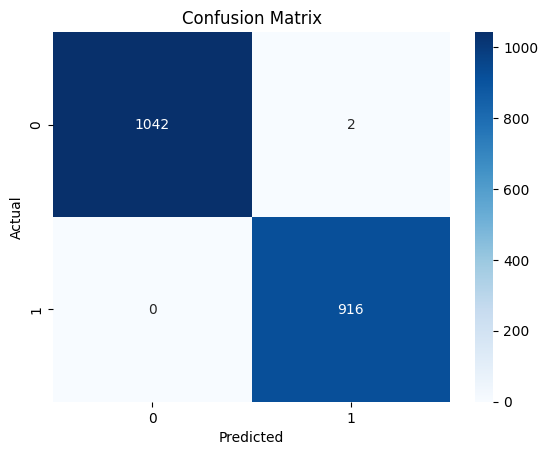

In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# building model using logistic regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [18]:
# Predict
y_pred = log_reg.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       916

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



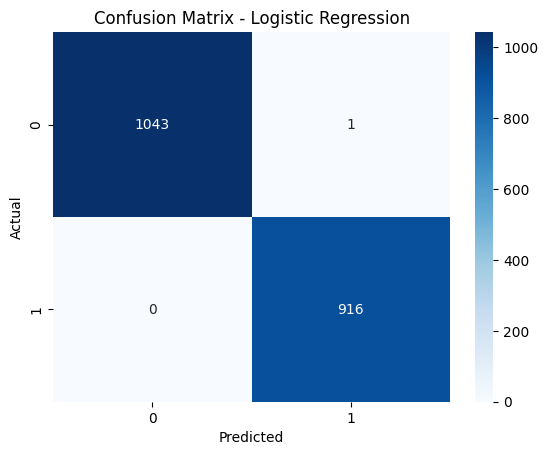

In [19]:
# STEP 11: Train Logistic Regression on the Balanced Dataset







# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
